GOVERNMENT DATA

In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [32]:
# Initialize the FRED API with your key
fred = Fred(api_key='99b15e0a2f3b3f4571893e831fd555d0') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2025-12-01")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [19]:
yields.index = pd.to_datetime(yields.index)
yields.loc['2020-01-03']


1 Month    1.52
3 Month    1.52
6 Month    1.55
1 Year     1.55
2 Year     1.53
3 Year     1.54
5 Year     1.59
7 Year     1.71
10 Year    1.80
20 Year    2.11
30 Year    2.26
Name: 2020-01-03 00:00:00, dtype: float64

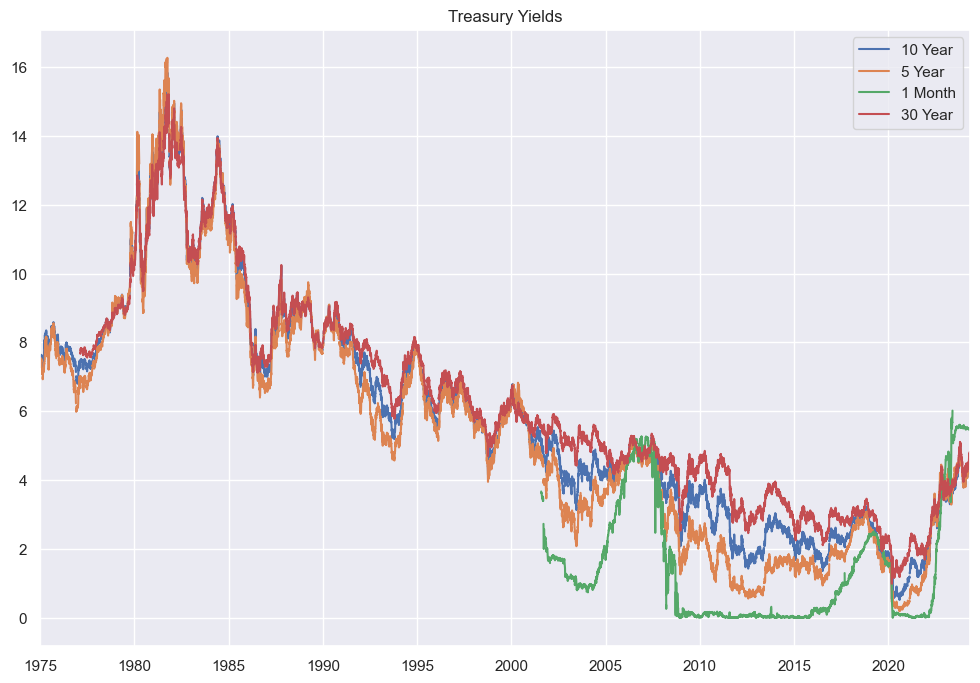

In [22]:
yields[['10 Year','5 Year','1 Month','30 Year']].plot(figsize = (12,8), title = 'Treasury Yields')
plt.show()


The bond yield has been steadily decreaing since it's last all time high during the 1980's with Reserve Chair raising 10 year yields as up as 16.25% with
the sole purpose of curbing the over expansion of the economy.

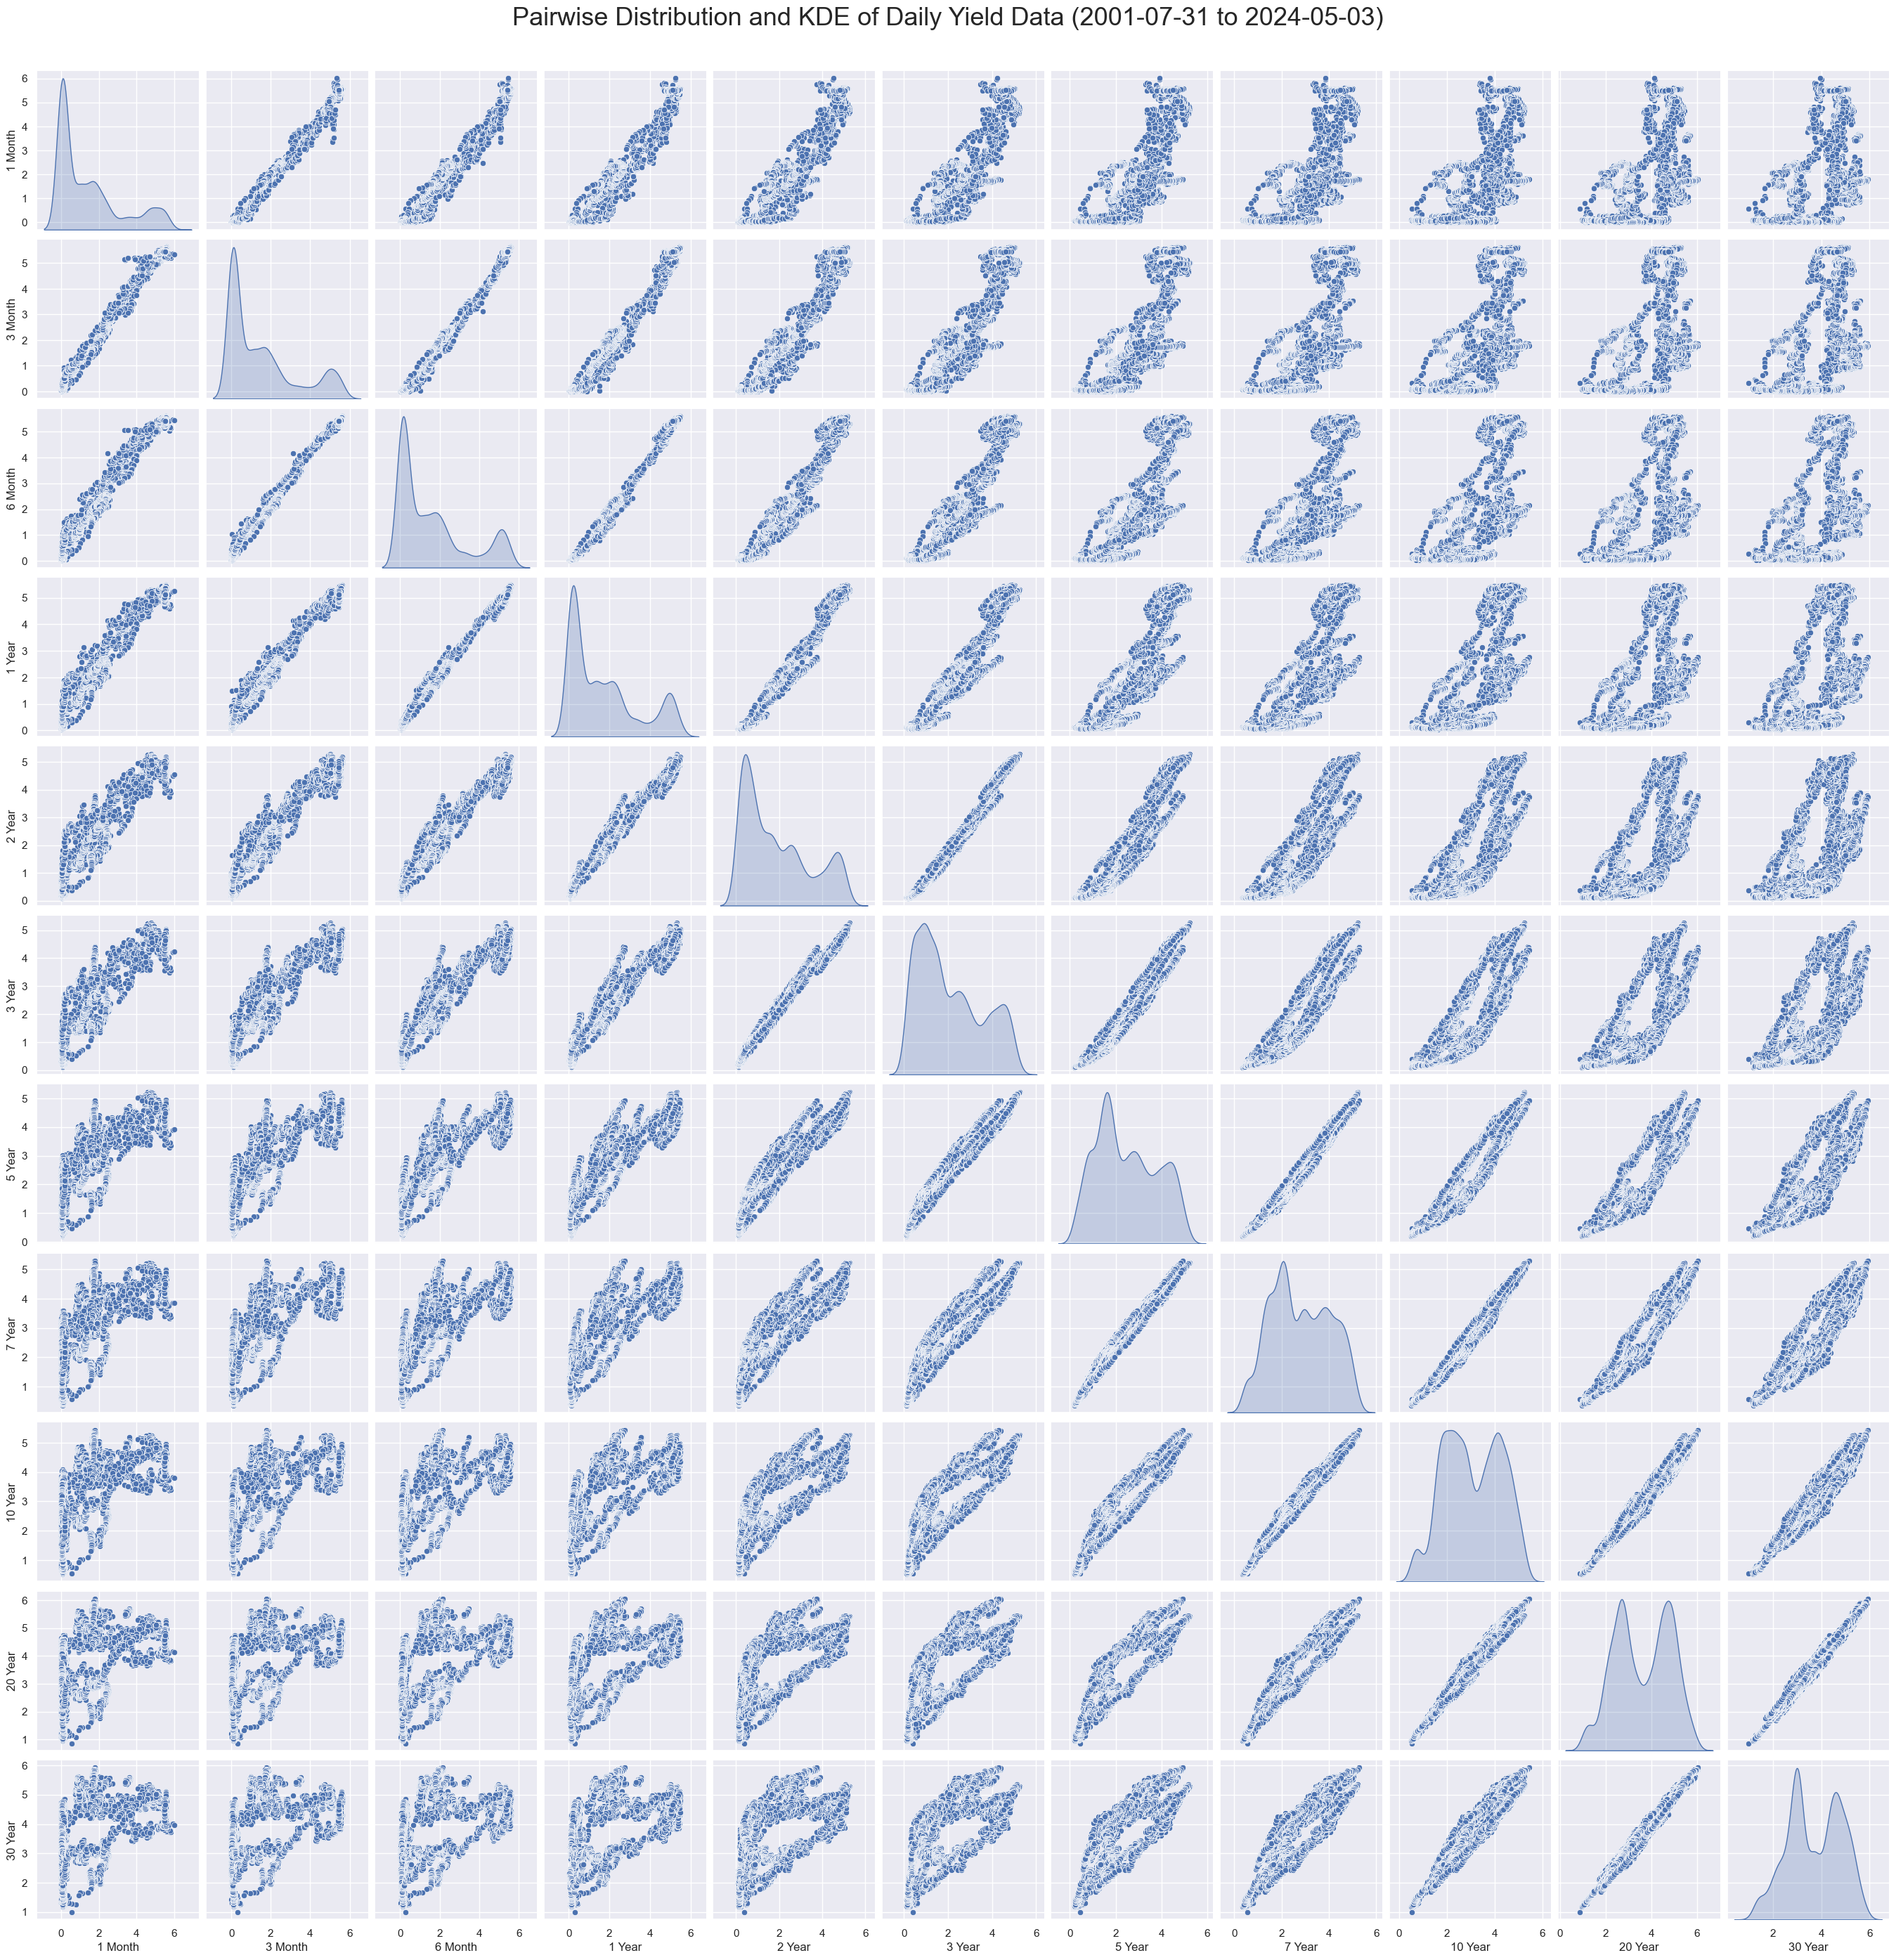

In [23]:
sns.pairplot(yields.dropna(), diag_kind='kde') # Pairplot with KDE on the diagonal
plt.suptitle("Pairwise Distribution and KDE of Daily Yield Data (2001-07-31 to 2024-05-03)",
             y=1.02, fontsize=26)
plt.show()


Yields that have relatively the similar time to maturity are highly correlated.

/var/folders/lj/j4hv7vps62b2bd_32mntq75r0000gn/T/ipykernel_4153/1568580406.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


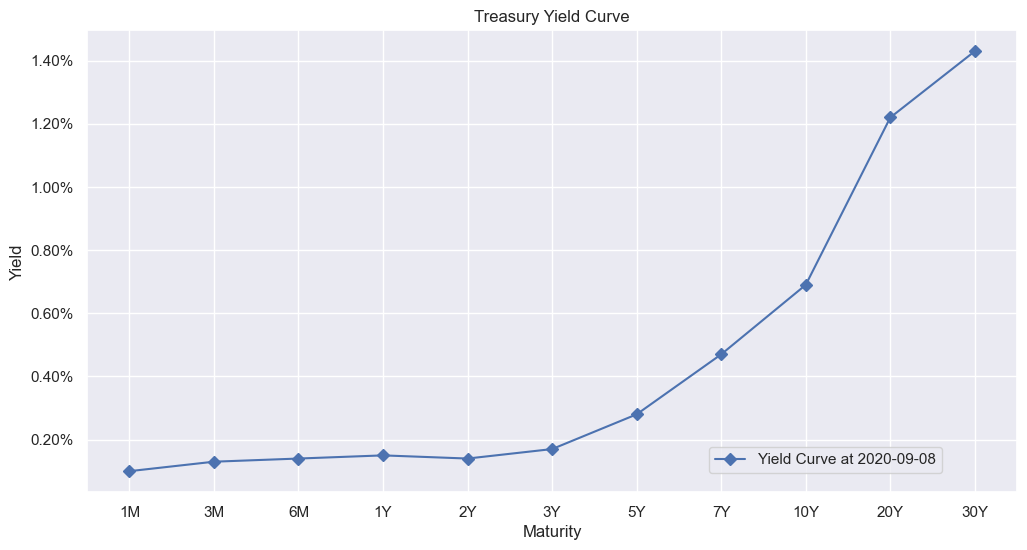

In [34]:
# Figure 3

def plot_yield_curve(date):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title('Treasury Yield Curve')

    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

plot_yield_curve('2020-09-08')



In [ ]:
The yield curve can be describe by its level and also its 